# Introduction
* YOU HAVE TO run cell in "Download Images" to prepare images for the code following.

This notebook contains:
1. sample code for reading, writing, and displaying image with opencv
2. programming exercises (from Section 3)



# 1. Download images 

In [1]:
%%shell

# RUN THIS CELL

###############################################################################################################
## Guidelines for sharing files
## 1. share a file (here, zip) with "anyone with link" in GoogleDrive
## 2. copy the link, here: https://drive.google.com/file/d/1qpoaVMI68ve23awAVAefM6352_1DE_rb/view?usp=sharing
## 3. extract the file-id, here: 1qpoaVMI68ve23awAVAefM6352_1DE_rb
## 4. download the file-id with gdown, as follows
###############################################################################################################
IMAGES="1qpoaVMI68ve23awAVAefM6352_1DE_rb"
cd /content/
rm -rf images.zip
rm -rf images
gdown -q --id $IMAGES --output images.zip
unzip -q images.zip
rm -rf images.zip

# 2. Code for reading, displaying and writing

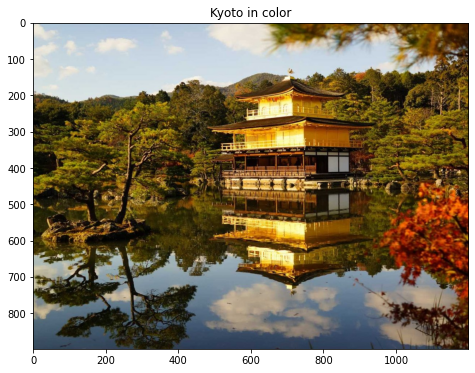

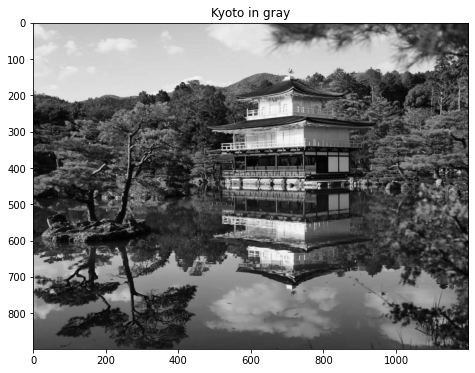

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
import math

"""
read_image:
  color: True => reading as color image (default) in RGB format
  color: False => reading as gray
"""
def read_image(filename, color=True):
  return cv2.cvtColor(cv2.imread(filename, 1 if color else 0), cv2.COLOR_BGR2RGB)

"""
if image_data is in color format then RGB must be used
"""
def write_image(filename, image_data):
  image_data = cv2.cvtColor(image_data, cv2.COLOR_RGB2BGR)
  cv2.imwrite(filename, image_data)

def show_image(image, title="sample", figsize=(8,6), tickoff=False):
  plt.figure(figsize=figsize)
  if image.ndim == 2:
      plt.imshow(image, cmap="gray", norm=NoNorm())
  else:
      plt.imshow(image)
  plt.title(title)
  plt.show()

image_rgb = read_image("./images/kyoto.jpg")
show_image(image_rgb, "Kyoto in color")
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
show_image(image_gray, "Kyoto in gray")

# 3. Calculating, normalizing, and displaying histogram

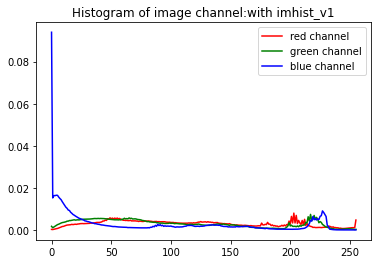

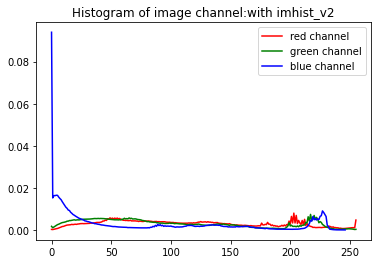

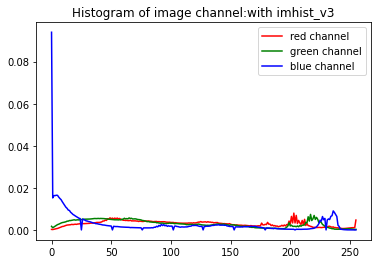

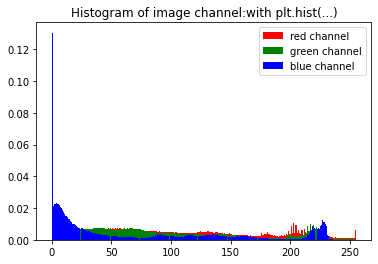

In [ ]:
###############################################################################################################
## Fill your into YOUR CODE HERE
###############################################################################################################

#version 1: use opencv to calculate the histogram, API=cv2.calcHist
def imhist_v1(image_gray, density=True):
  # YOUR CODE HERE
  if density:
    total = len(image_gray[0])*len(image_gray[1])
  else:
    total = 1
  hist = []
  for i in range(3):
    hist.append(cv2.calcHist([image_gray], [i], None, [256], [0, 256])/total)
  return hist

#version 2: use numpy to calculate the histogram, with np.bincount
def imhist_v2(image_gray, density=True):
  # YOUR CODE HERE
  if density:
    total = len(image_gray[0])*len(image_gray[1])
  else:
    total = 1
  flat = []
  hist = []
  for i in range(3):
    flat = image_gray[:,:,(i)].flatten()
    hist.append(np.bincount(np.array(flat))/total)
  return hist

#version 3: use numpy to calculate the histogram, with np.histogram
def imhist_v3(image_gray, density=True):
  # YOUR CODE HERE
  if density:
    total = len(image_gray[0])*len(image_gray[1])
  else:
    total = 1
  flat = []
  hist = []
  for i in range(3):
    flat = image_gray[:,:,(i)].flatten()
    temphist, bins = np.histogram(flat, bins = 256)
    hist.append(temphist/total)
  return hist

def plotImhist(image, functionHist, plotName):
  hist= functionHist(image)
  for i, col in enumerate(["red", "green", "blue"]):    
    plt.plot(hist[i],color = col,  label = (col + " channel"))
  # plt.legend([plt.plot(index) for index in hist], ["red channel", "green channel", "blue channel"])
  # plt.plot(hist[0],color = "red",  label = ("red" + " channel"))
  plt.title("Histogram of image channel:with " + plotName)
  plt.legend(loc='upper right')
  plt.show()

plotImhist(image_rgb, imhist_v1, "imhist_v1")
plotImhist(image_rgb, imhist_v2, "imhist_v2")
plotImhist(image_rgb, imhist_v3, "imhist_v3")


for i, col in enumerate(["red", "green", "blue"]):
  plt.hist(image_rgb[:,:,(i)].flatten(), 256, density = 1, color =col, label = (col + " channel"))
plt.title("Histogram of image channel:with plt.hist(...)")
plt.legend(loc='upper right')
plt.rcParams["figure.figsize"] = (10,4)
plt.show()

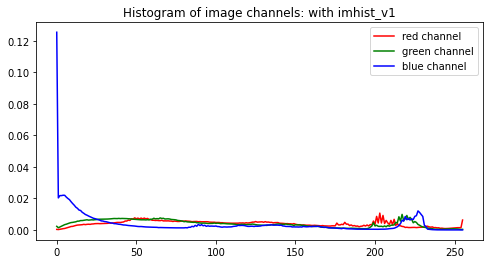

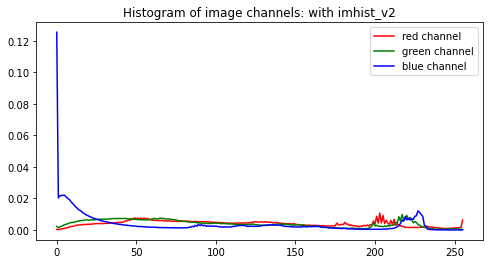

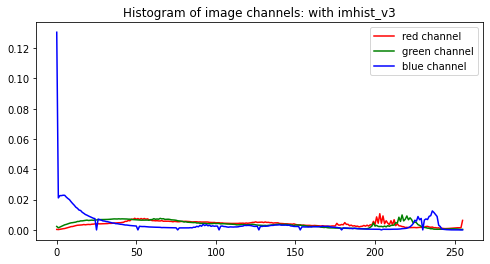

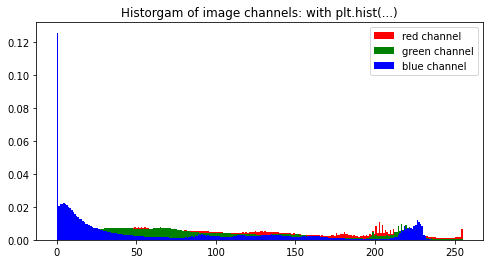

In [ ]:

# Show the histogram of the three channels of image "./images/kyoto.jpg"
# The the figure below

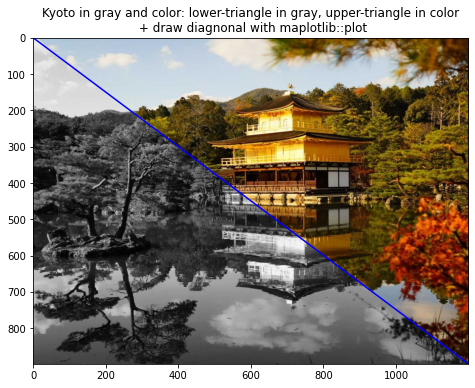

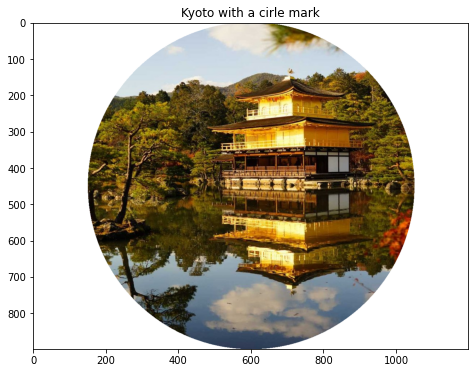

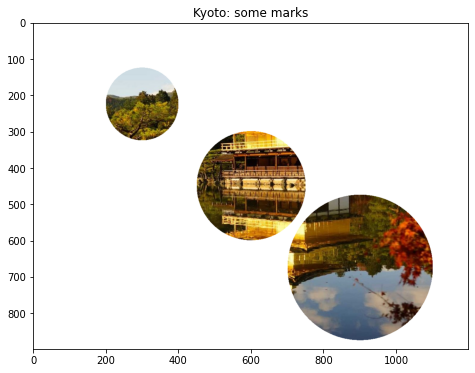

In [ ]:

# Image = "./images/kyoto.jpg"
# Create the following images
image_rgb = read_image("./images/kyoto.jpg")
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
# image_gray3 = np.expand_dims(image_gray, -1)
# Non_color = np.array([image_gray,image_gray,image_gray])

dimy, dimx, _ = image_rgb.shape
# dimy = len(image_rgb[0])
y = [0, len(image_rgb[0])]
x = [0,len(image_rgb[:,0,0])]
def funcDiagnonal(a):
  return a/dimx*dimy

# ==============================================
xar, yar = np.arange(dimx), np.arange(dimy)
xv, yv = np.meshgrid(xar,yar)
mask = yv > (dimy/dimx)*xv
combine = image_rgb.copy()
combine[mask,0] = image_gray[mask]
combine[mask,1] = image_gray[mask]
combine[mask,2] = image_gray[mask]
# ==============================================
plt.plot(y, x, color="blue")
plt.imshow(combine)
plt.rcParams["figure.figsize"] = (20,6)
plt.title("Kyoto in gray and color: lower-triangle in gray, upper-triangle in color\n + draw diagnonal with maplotlib::plot")
plt.show()

# =======================
# Kyoto in cycle
radius = min(dimx,dimy)/2
center = [dimx/2,dimy/2]
circleImage = np.full((dimy, dimx,3), 255, dtype="uint8")
xar, yar = np.arange(dimx), np.arange(dimy)
yv, xv = np.meshgrid(xar,yar)
mask = (dimy/2-xv)**2+(dimx/2-yv)**2 <= radius**2

circleImage[mask,:] = image_rgb[mask,:]
plt.imshow(circleImage)
plt.rcParams["figure.figsize"] = (20,6)
plt.title("Kyoto with a cirle mark")
plt.show()

# =======================
# Kyoto in cycle
radius1 = 100
center1 = [dimx/4,dimy/4]
radius2 = 150
center2 = [dimx/2,dimy/2]
radius3 = 200
center3 = [dimx*0.75,dimy*0.75]
circleImage = np.full((dimy, dimx,3), 255, dtype="uint8")
mask1 = (center1[0]-yv)**2+(center1[1]-xv)**2 <= radius1**2 
mask2 = (center2[0]-yv)**2+(center2[1]-xv)**2 <= radius2**2 
mask3 = (center3[0]-yv)**2+(center3[1]-xv)**2 <= radius3**2
mask = mask1 + mask2 + mask3
circleImage[mask,:] = image_rgb[mask,:]
plt.imshow(circleImage)
plt.rcParams["figure.figsize"] = (20,6)
plt.title("Kyoto: some marks")
plt.show()


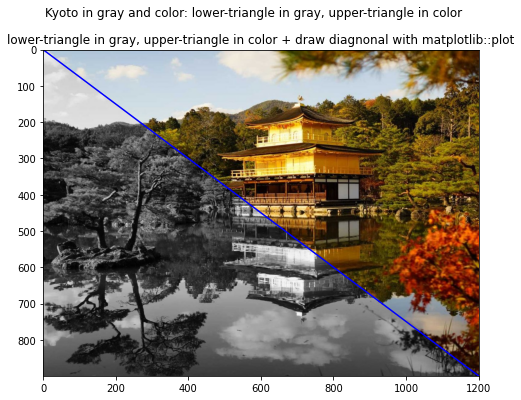

In [ ]:
# Image = "./images/kyoto.jpg"
# Create the following images


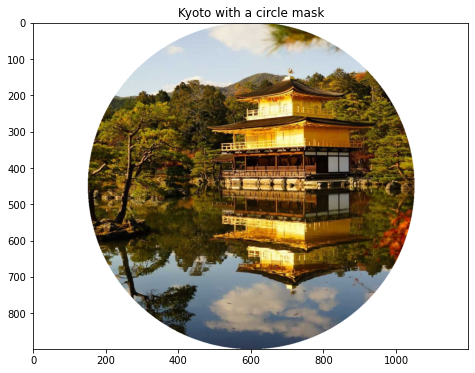

In [ ]:
# Image = "./images/kyoto.jpg"
# Create the following images


1. centers (O_1, O_2, O_3) of circles on the diagonal
2. O: the origin
3. OO_1 = 0.25*length(diagonal)
4. OO_2 = 0.5*length(diagonal)
5. OO_3 = 0.75*length(diagonal)
6. radius1,2,3 = 100, 150, 200


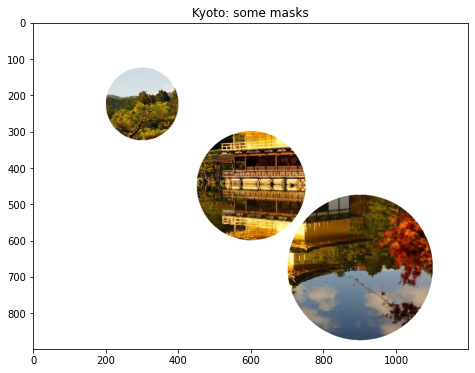

In [ ]:
# Image = "./images/kyoto.jpg"
# Create the following images